In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('bill_authentication.csv')

In [29]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [30]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [32]:
df = df.sample(frac=1.0).reset_index(drop=True)
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,4.09720,0.46972,1.667100,0.915930,0
1,0.77805,6.64240,-1.142500,-1.057300,0
2,-3.92970,-6.08160,10.095800,-1.014700,1
3,-0.98193,2.79560,-1.234100,-1.566800,1
4,1.51800,5.69460,0.094818,-0.026738,0


In [33]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


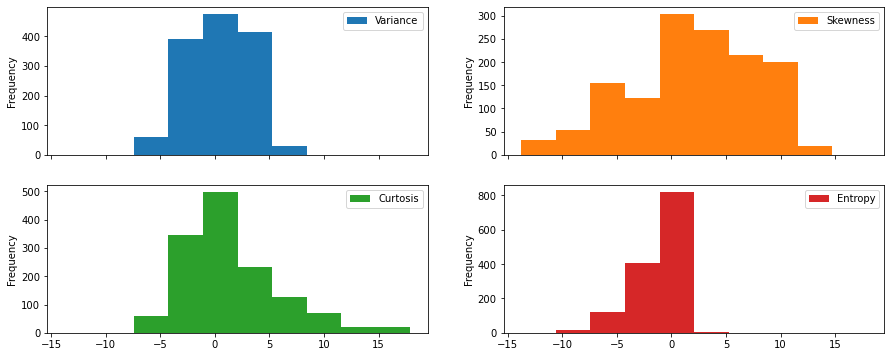

In [34]:
df.iloc[:,0:-1].plot(kind='hist',subplots=True,layout=(2,2),figsize=(15,6));

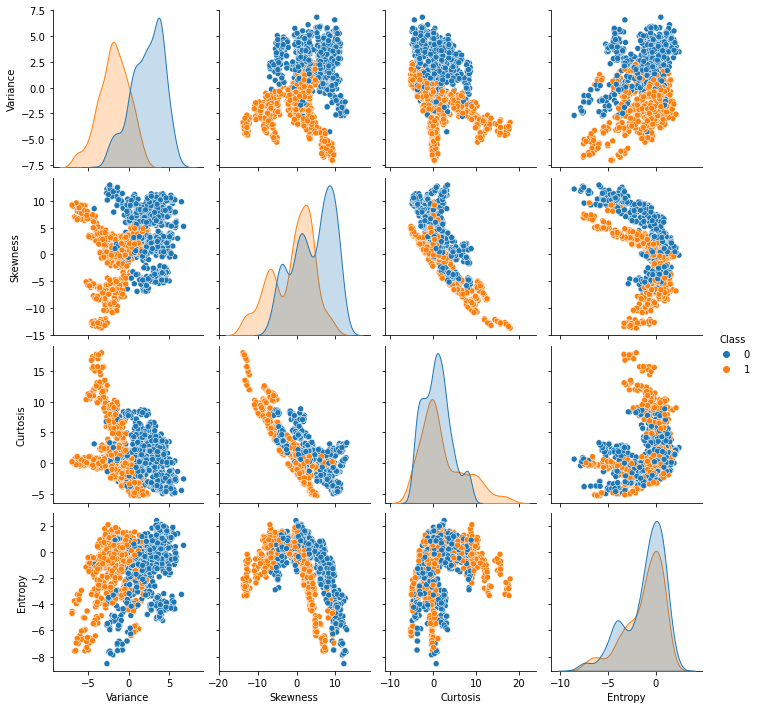

In [35]:
sns.pairplot(data=df,hue='Class');

In [36]:
df.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


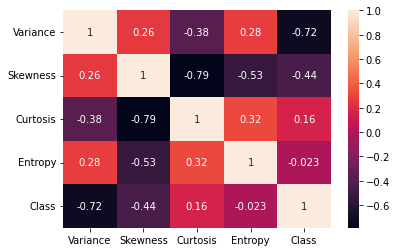

In [37]:
sns.heatmap(df.corr(),annot=True);

In [38]:
from sklearn.preprocessing import RobustScaler

X = df.drop('Class',axis=1)
Y = df['Class']

RS = RobustScaler()
X = RS.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# Random Forest Classifier(RFC)

In [40]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)

Y_pred = RFC.predict(X_test)

In [41]:
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pred))
print(metrics.confusion_matrix(Y_test,Y_pred))
print(metrics.classification_report(Y_test,Y_pred))

Accuracy:  0.9854545454545455
[[146   3]
 [  1 125]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       149
           1       0.98      0.99      0.98       126

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [42]:
accuracy_list =[]

for n_est in range(50,201,10):
  RFC = RandomForestClassifier(n_estimators=n_est)
  RFC.fit(X_train,Y_train)
  accuracy_list.append(round(metrics.accuracy_score(Y_test,RFC.predict(X_test))*100,2))

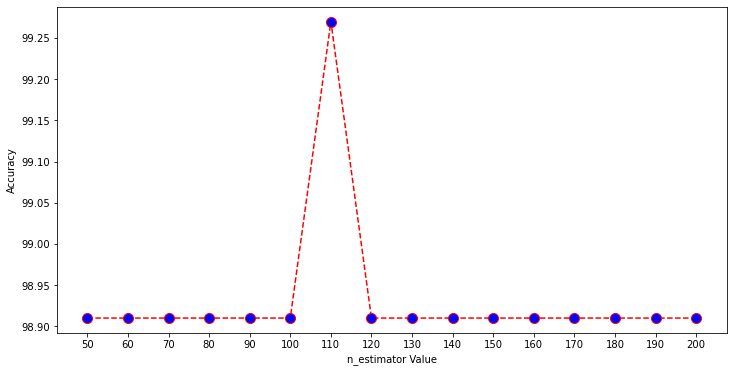

In [43]:
plt.figure(figsize=(12, 6))  
plt.plot(range(50, 201, 10), accuracy_list, color='red', 
         linestyle='dashed', marker='o', markerfacecolor='blue', 
         markersize=10)
plt.xticks(range(50, 201, 10))
plt.xlabel('n_estimator Value')
plt.ylabel('Accuracy');

# Decision Tree Classification

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
DC_cls = DecisionTreeClassifier() 

In [46]:
DC_cls.fit(X_train,Y_train)

Y_pred = RFC.predict(X_test)

In [47]:
from sklearn import metrics

print("Accuracy: ",metrics.accuracy_score(Y_test,Y_pred))


Accuracy:  0.9890909090909091
